In [2]:
pip install seaborn

  Using cached seaborn-0.12.0-py3-none-any.whl (285 kB)
Note: you may need to restart the kernel to use updated packages.


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
import warnings

warnings.simplefilter("ignore")

donnees = pd.read_csv("diabetes.csv")

X = donnees.drop(["Outcome"], axis=1)
y = donnees["Outcome"]
donnees

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [27]:
#on va d'abord chercher les deux attributs les plus utiles grace aux matrices de corrélation

for colonne in donnees:
    print("Matrice de corrélation entre la colonne \"",colonne, "\" et la target")
    matrix = np.corrcoef(donnees[colonne], y)
    print(matrix)
    print("====================================")

Matrice de corrélation entre la colonne " Pregnancies " et la target
[[1.         0.22189815]
 [0.22189815 1.        ]]
Matrice de corrélation entre la colonne " Glucose " et la target
[[1.        0.4665814]
 [0.4665814 1.       ]]
Matrice de corrélation entre la colonne " BloodPressure " et la target
[[1.         0.06506836]
 [0.06506836 1.        ]]
Matrice de corrélation entre la colonne " SkinThickness " et la target
[[1.         0.07475223]
 [0.07475223 1.        ]]
Matrice de corrélation entre la colonne " Insulin " et la target
[[1.         0.13054795]
 [0.13054795 1.        ]]
Matrice de corrélation entre la colonne " BMI " et la target
[[1.         0.29269466]
 [0.29269466 1.        ]]
Matrice de corrélation entre la colonne " DiabetesPedigreeFunction " et la target
[[1.         0.17384407]
 [0.17384407 1.        ]]
Matrice de corrélation entre la colonne " Age " et la target
[[1.         0.23835598]
 [0.23835598 1.        ]]
Matrice de corrélation entre la colonne " Outcome "

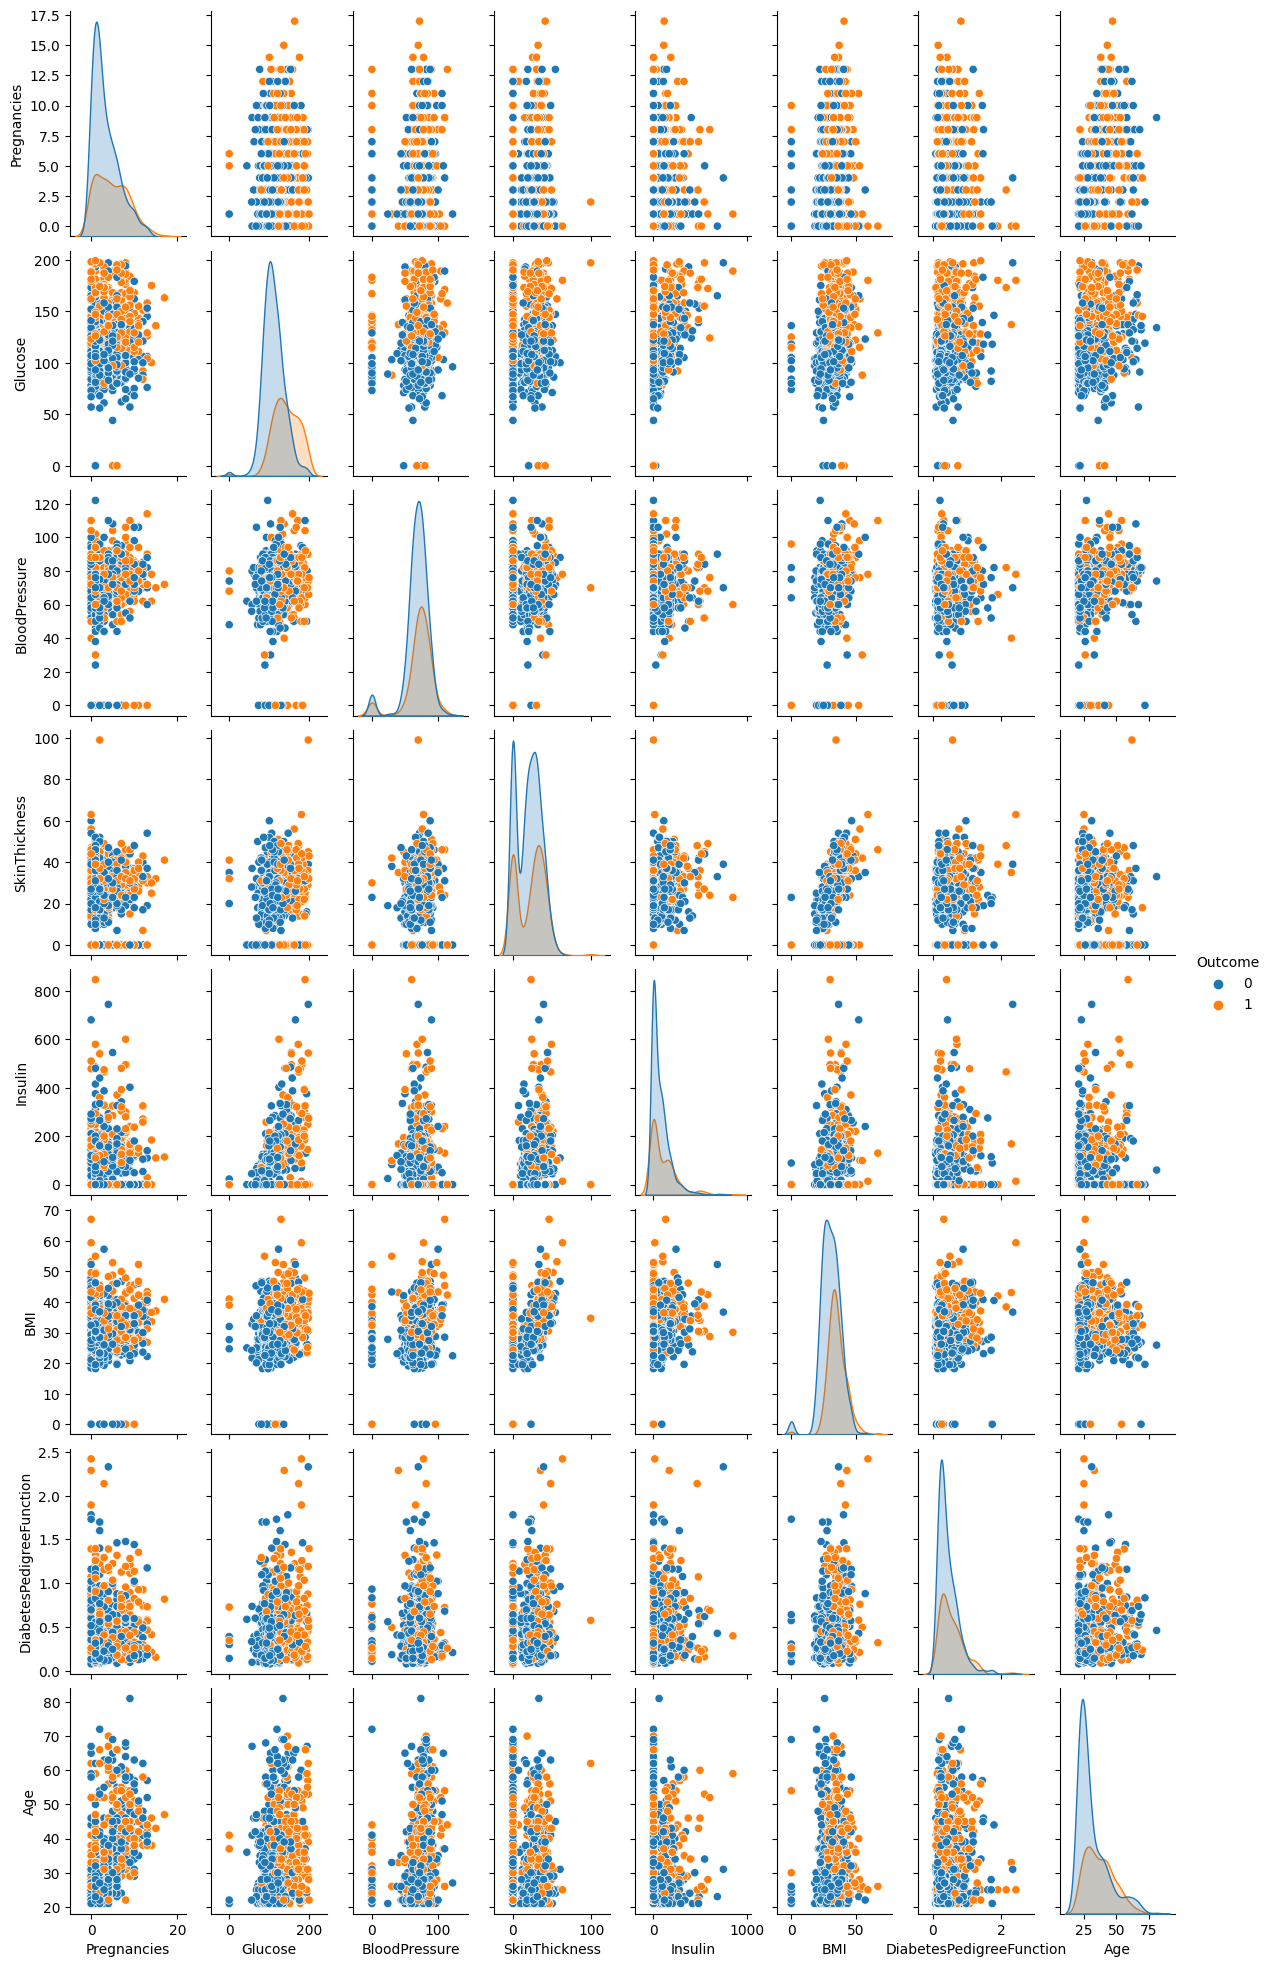

In [28]:
import seaborn as sns
sns.pairplot(donnees, aspect=0.6, hue = "Outcome")

In [102]:
from sklearn.metrics import accuracy_score

colonneB = ["Age","Insulin","SkinThickness","BMI","Pregnancies"]

for j in range(len(colonneB)):
    
    X=donnees[["Glucose", colonneB[j]]]
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    C = 1.0 # paramètre de régularisation 
    lin_svc = svm.LinearSVC(C=C) 
    lin_svc.fit(X_train, y_train)
    pred = lin_svc.predict(X_test)
    score = lin_svc.score(X_test, y_test)
    print("Paire : Glucose | ", colonneB[j]," Score : ", score)

Paire : Glucose |  Age  Score :  0.734375
Paire : Glucose |  Insulin  Score :  0.75
Paire : Glucose |  SkinThickness  Score :  0.7421875
Paire : Glucose |  BMI  Score :  0.765625
Paire : Glucose |  Pregnancies  Score :  0.7447916666666666


Voici ci-dessus le score d'échantillons bien classifiés sur le jeu de données de test. On a afficher les différents scores pour les différentes paires. On remarque que le score le plus élevé est : 0.77, la paire est glucose et BMI.

Nous précisions que nous avons standardiser les données afin de normaliser les différentes colonnes de X. En effet notre dataset possède pour chaque colonne plusieurs valeurs bien dispersées. Exemple : pour la colonne BMI on a un IMC à 68.
Voici ci-dessous les scores que nous obtenons si nous ne standardisons pas les données du dataset. Les scores sont plus bas.

In [65]:
colonneB = ["Age","Insulin","SkinThickness","BMI","Pregnancies"]

for j in range(len(colonneB)):
    
    X=donnees[["Glucose", colonneB[j]]]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    C = 1.0 # paramètre de régularisation 
    lin_svc = svm.LinearSVC(C=C) 
    lin_svc.fit(X_train, y_train)
    pred = lin_svc.predict(X_test)
    score = lin_svc.score(X_test, y_test)
    print("Paire : Glucose | ", colonneB[j]," Score : ", score)

Paire : Glucose |  Age  Score :  0.625
Paire : Glucose |  Insulin  Score :  0.625
Paire : Glucose |  SkinThickness  Score :  0.6822916666666666
Paire : Glucose |  BMI  Score :  0.6432291666666666
Paire : Glucose |  Pregnancies  Score :  0.390625


Score :  0.7526041666666666


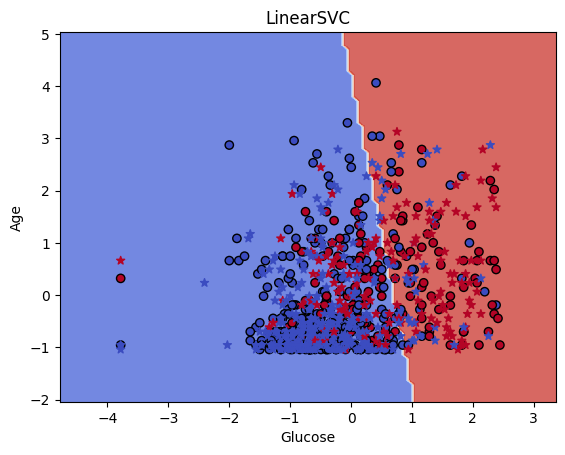

Score :  0.7239583333333334


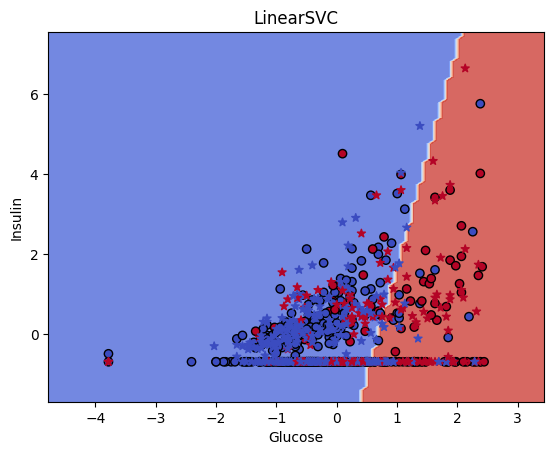

Score :  0.7239583333333334


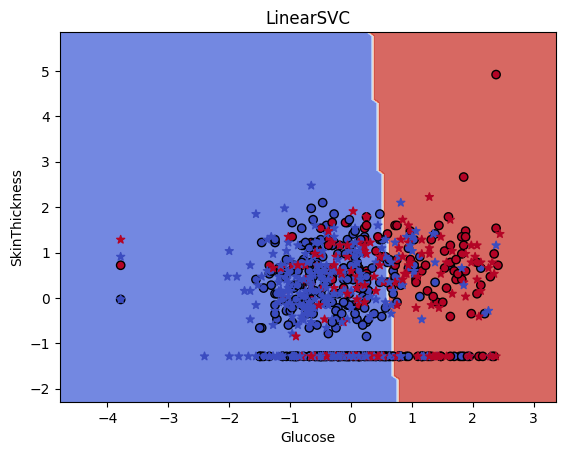

Score :  0.7421875


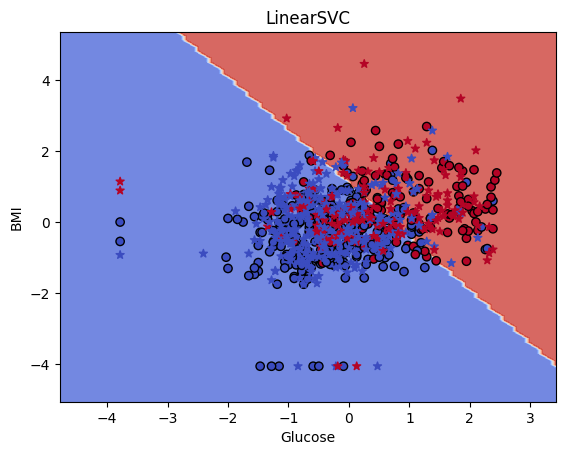

Score :  0.7760416666666666


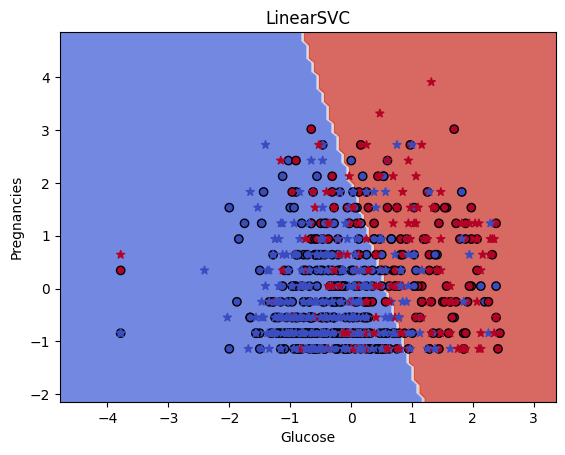

In [58]:
from sklearn.metrics import accuracy_score

colonneB = ["Age","Insulin","SkinThickness","BMI","Pregnancies"]
colonneA = ["Glucose"]

for j in range(len(colonneB)):
    
    X=donnees[["Glucose", colonneB[j]]]
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    C = 1.0 # paramètre de régularisation 
    lin_svc = svm.LinearSVC(C=C) 
    lin_svc.fit(X_train, y_train)
    pred = lin_svc.predict(X_test)
    score = lin_svc.score(X_test, y_test)
    print("Score : ", score)
            
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1 
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1 
    # Pour afficher la surface de décision on va discrétiser l'espace avec un pas h 
    h = max((x_max - x_min) / 100, (y_max - y_min) / 100) 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 

    # Surface de décision 
    Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape) 

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8) 
    # Afficher aussi les points d'apprentissage 
    plt.scatter(X_train[:,0],  X_train[:,1],  label="train",  edgecolors='k', 
    c=y_train, cmap=plt.cm.coolwarm) 
    plt.scatter(X_test[:,0], X_test[:,1], label="test", marker='*', c=y_test, 
    cmap=plt.cm.coolwarm) 
    plt.xlabel("Glucose") 
    plt.ylabel(colonneB[j]) 
    plt.title("LinearSVC")
    plt.show()

Voici ci-dessus, la surface de décision apprise par notre modèle suite à l'apprentissage réalisé auparavant. Les données d'apprentissage sont représentées avec les ronds, tandis que les données de test sont représentées avec des étoiles.<br>
Nouus obtenons des scores corrects grâce à la standardisation, on remarque que les lignes de découpages décooupe globalement les deux classes de manièrer correctes. Nous ne pouvons pas découper parfaitement car c'est un SVM Linéaire et que le spoints sont très corélé. Il serait envisagble de tester avec un SVM non linéaire.


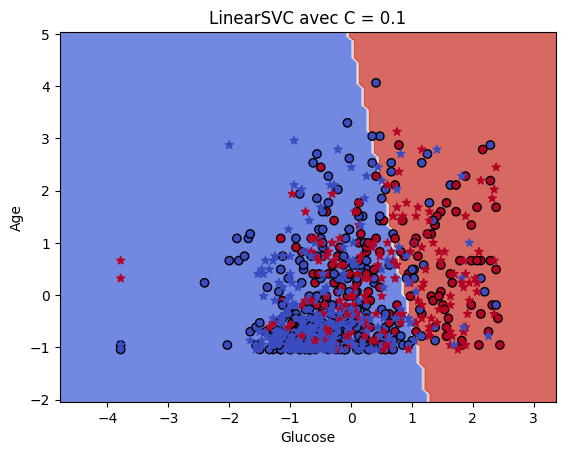

Paire : Glucose |  Age  Score obtenu avec C = 0.1  =>  0.7421875


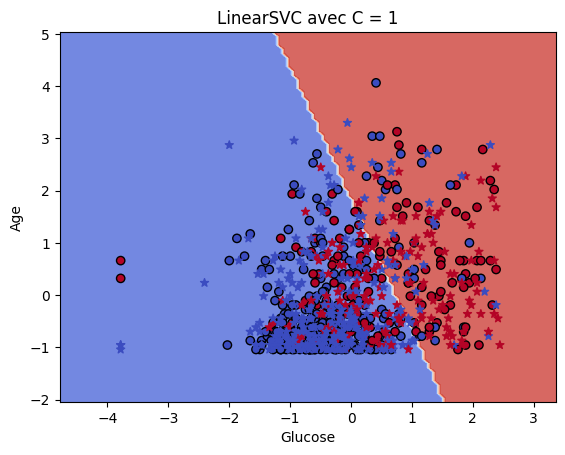

Paire : Glucose |  Age  Score obtenu avec C = 1  =>  0.7421875


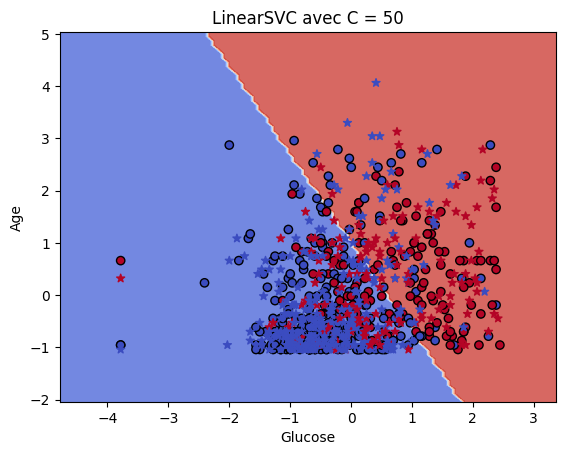

Paire : Glucose |  Age  Score obtenu avec C = 50  =>  0.7317708333333334


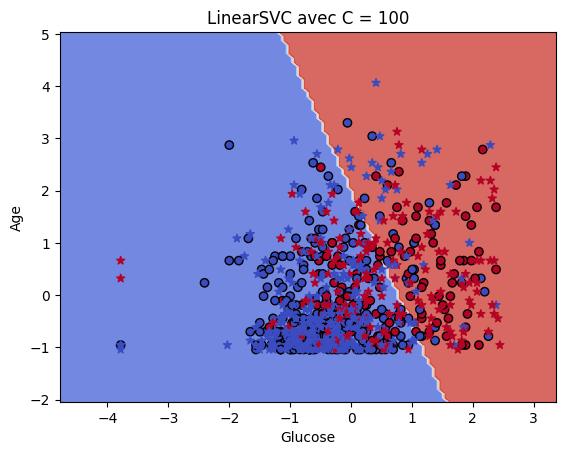

Paire : Glucose |  Age  Score obtenu avec C = 100  =>  0.7239583333333334


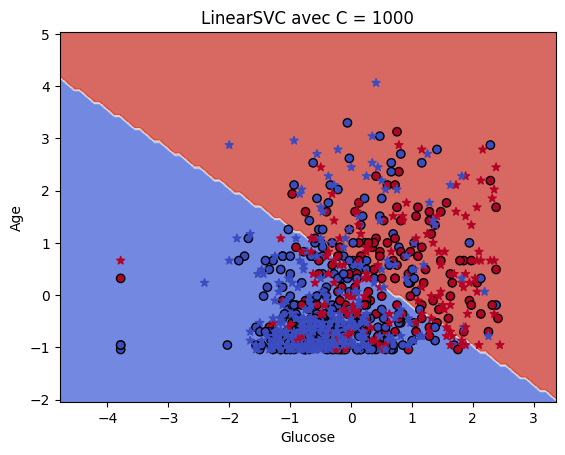

Paire : Glucose |  Age  Score obtenu avec C = 1000  =>  0.7161458333333334


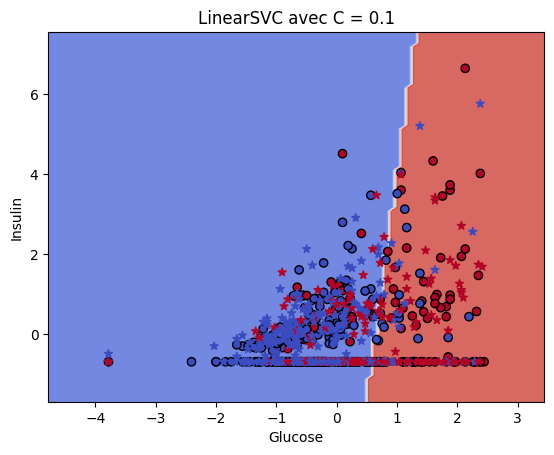

Paire : Glucose |  Insulin  Score obtenu avec C = 0.1  =>  0.7083333333333334


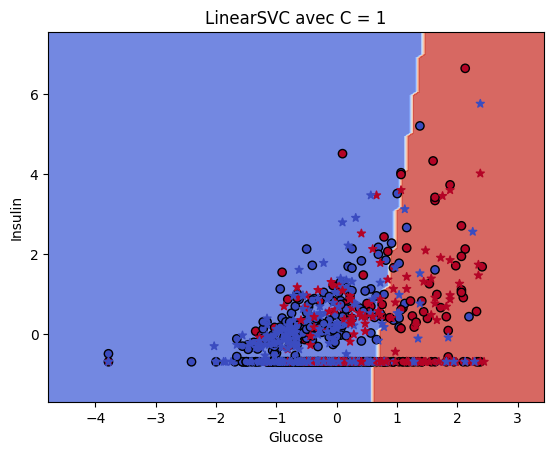

Paire : Glucose |  Insulin  Score obtenu avec C = 1  =>  0.7239583333333334


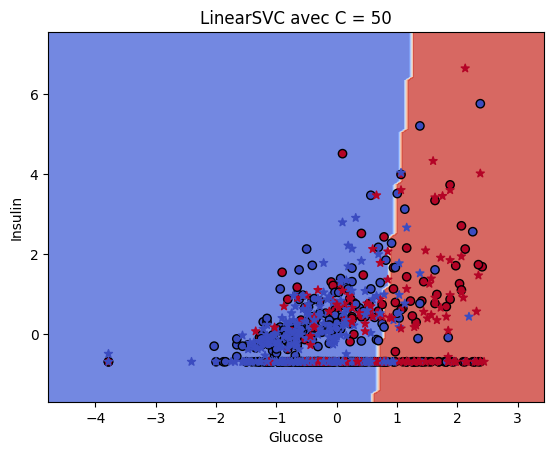

Paire : Glucose |  Insulin  Score obtenu avec C = 50  =>  0.7526041666666666


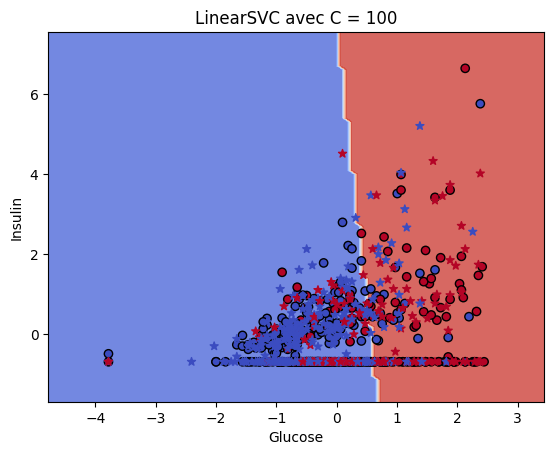

Paire : Glucose |  Insulin  Score obtenu avec C = 100  =>  0.734375


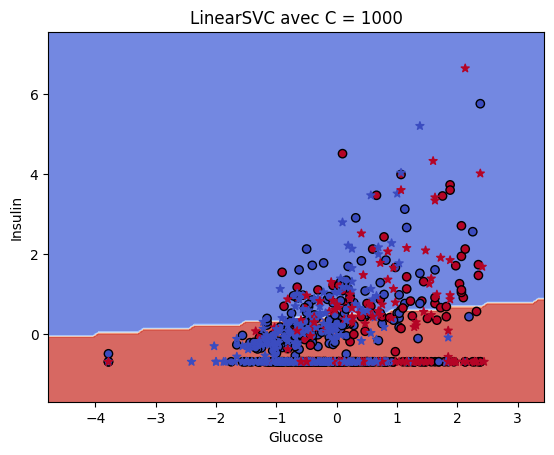

Paire : Glucose |  Insulin  Score obtenu avec C = 1000  =>  0.3567708333333333


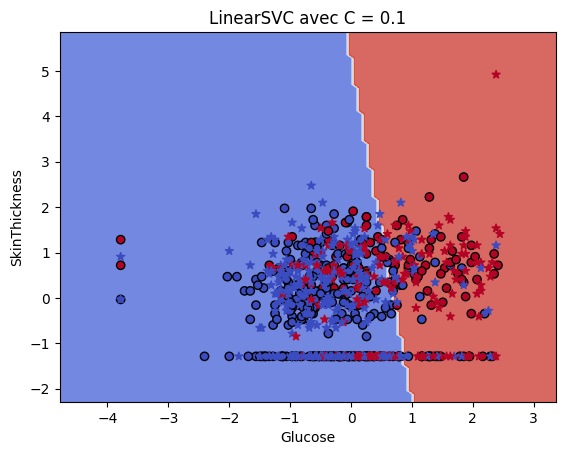

Paire : Glucose |  SkinThickness  Score obtenu avec C = 0.1  =>  0.7265625


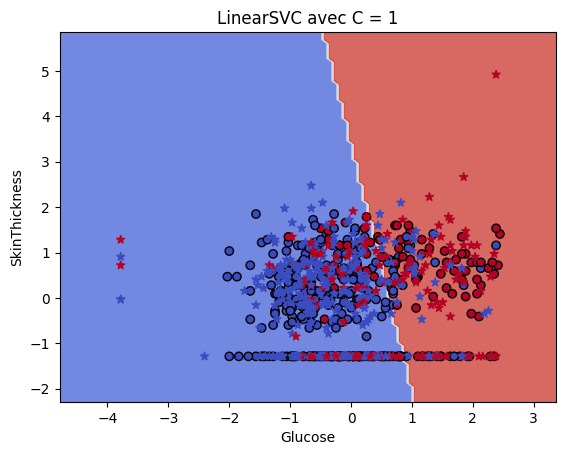

Paire : Glucose |  SkinThickness  Score obtenu avec C = 1  =>  0.7161458333333334


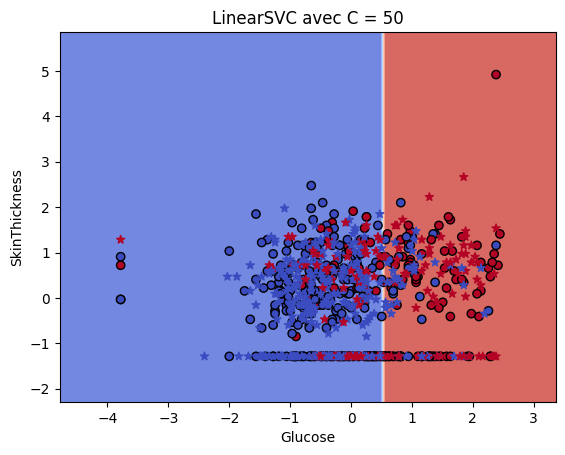

Paire : Glucose |  SkinThickness  Score obtenu avec C = 50  =>  0.7317708333333334


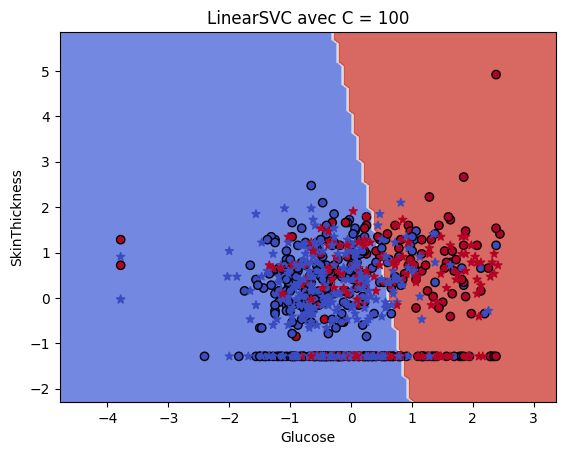

Paire : Glucose |  SkinThickness  Score obtenu avec C = 100  =>  0.7135416666666666


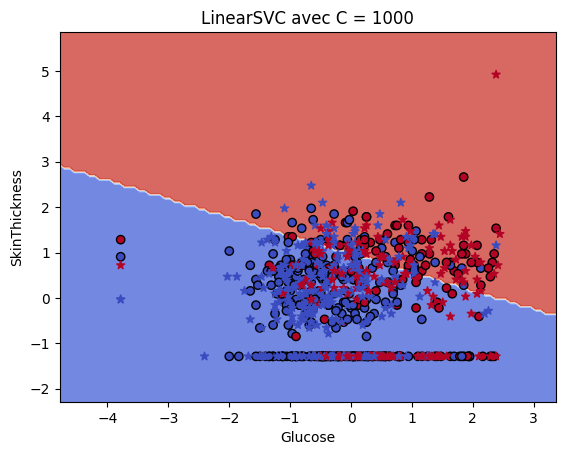

Paire : Glucose |  SkinThickness  Score obtenu avec C = 1000  =>  0.6588541666666666


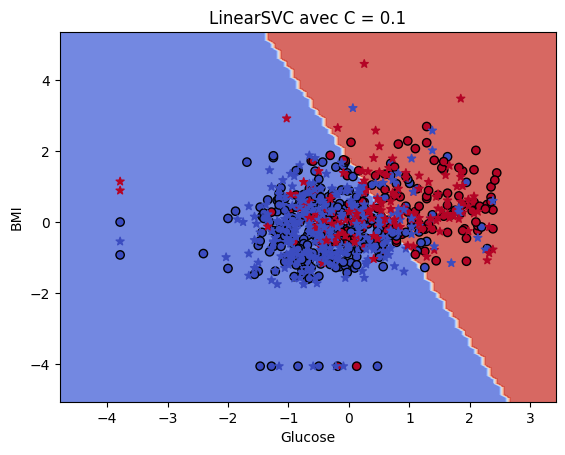

Paire : Glucose |  BMI  Score obtenu avec C = 0.1  =>  0.7760416666666666


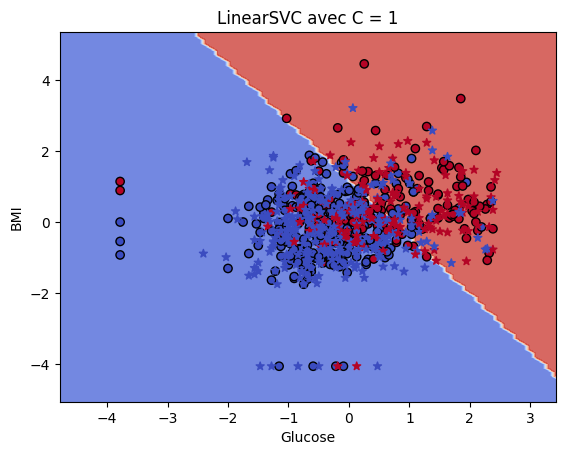

Paire : Glucose |  BMI  Score obtenu avec C = 1  =>  0.765625


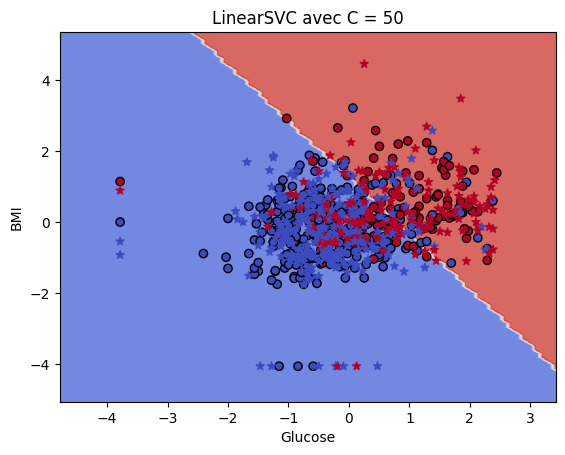

Paire : Glucose |  BMI  Score obtenu avec C = 50  =>  0.7552083333333334


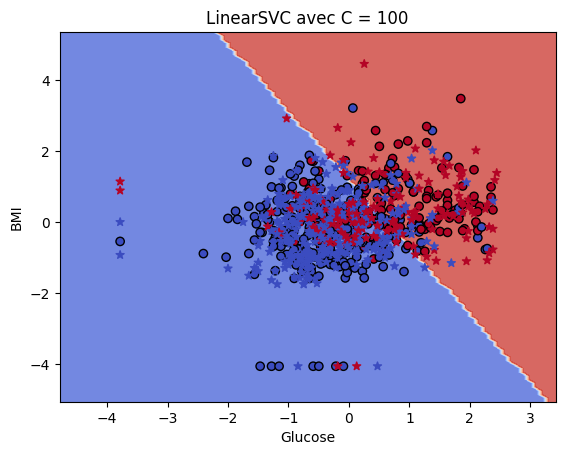

Paire : Glucose |  BMI  Score obtenu avec C = 100  =>  0.75


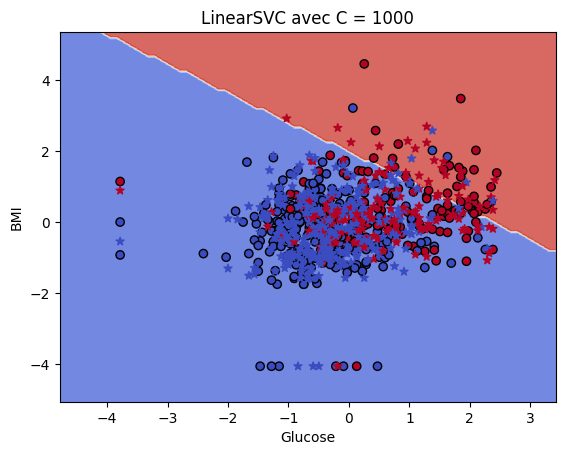

Paire : Glucose |  BMI  Score obtenu avec C = 1000  =>  0.6979166666666666


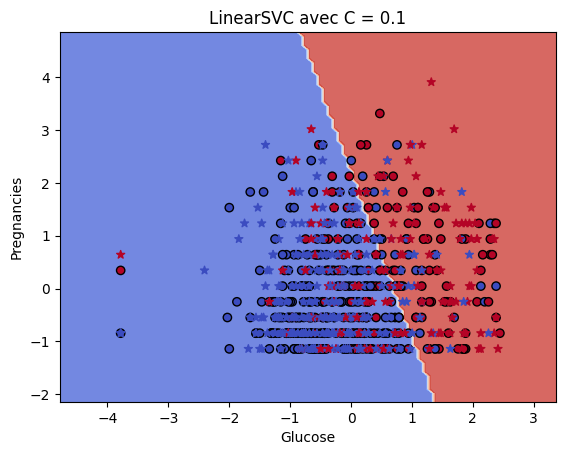

Paire : Glucose |  Pregnancies  Score obtenu avec C = 0.1  =>  0.765625


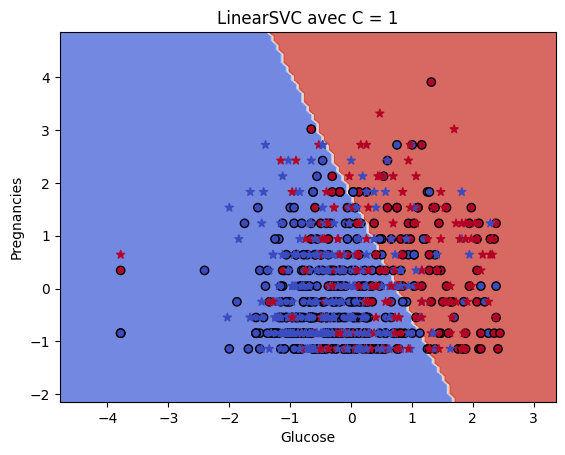

Paire : Glucose |  Pregnancies  Score obtenu avec C = 1  =>  0.734375


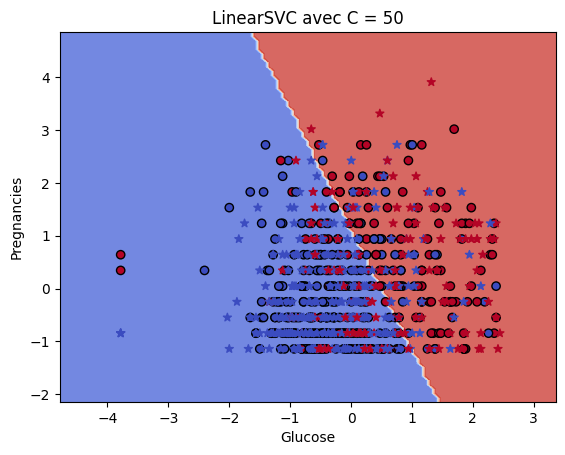

Paire : Glucose |  Pregnancies  Score obtenu avec C = 50  =>  0.7760416666666666


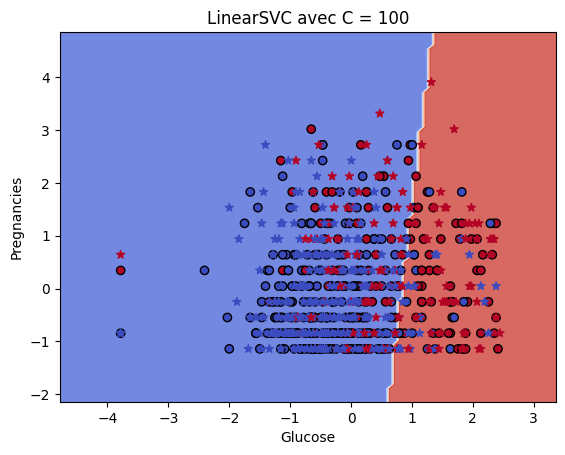

Paire : Glucose |  Pregnancies  Score obtenu avec C = 100  =>  0.765625


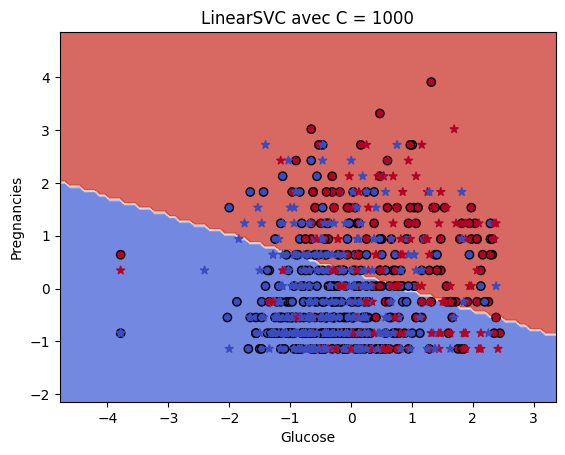

Paire : Glucose |  Pregnancies  Score obtenu avec C = 1000  =>  0.671875


In [120]:
from sklearn.model_selection import GridSearchCV
colonneB = ["Age","Insulin","SkinThickness","BMI","Pregnancies"]
valC = [0.1,1,50,100,1000]


for j in range(len(colonneB)):
    for i in range(len(valC)):
        
        X=donnees[["Glucose", colonneB[j]]]

        scaler = StandardScaler()
        X = scaler.fit_transform(X)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

        C = valC[i] 
        lin_svc = svm.LinearSVC(C=C) 
        lin_svc.fit(X_train, y_train)
        pred = lin_svc.predict(X_test)
        score = lin_svc.score(X_test, y_test)
        
        x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1 
        y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1 
        # Pour afficher la surface de décision on va discrétiser l'espace avec un pas h 
        h = max((x_max - x_min) / 100, (y_max - y_min) / 100) 
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 

        # Surface de décision 
        Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()]) 
        Z = Z.reshape(xx.shape) 

        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8) 
        # Afficher aussi les points d'apprentissage 
        plt.scatter(X_train[:,0],  X_train[:,1],  label="train",  edgecolors='k', 
        c=y_train, cmap=plt.cm.coolwarm) 
        plt.scatter(X_test[:,0], X_test[:,1], label="test", marker='*', c=y_test, 
        cmap=plt.cm.coolwarm) 
        plt.xlabel("Glucose") 
        plt.ylabel(colonneB[j]) 
        plt.title("LinearSVC avec C = "+str(C))
        plt.show()
        
        print("Paire : Glucose | ", colonneB[j]," Score obtenu avec C =", C," => ", score)

Ci-dessus, nous avons les surfaces de décision avec différents paramètres de C. On remarque que pour la paire Glucose Age, la frontière se déssine mieux lorsque C augmente mais reste inférieur à 100. Lorsque C = 50 la score est 0.73 et la frontière est mieux déssinée que lorsque C est < 50 mais nous remarquons aussi en regardant les autres frontières de décisions des autres paires que la valeur idéale de C varie selon les paires et plus précisémment selon la répartition des données.
Le problème est que nous ne pouvons pas généraliser une valeur de C pour toutes les paires car la valeur optimale de C dépend de la répartitions des données sur l'axe des abcisses et des dordonnées.
Voici ce que nous avons constaté : 
Glucose | Age meilleur valeur de C : 50
Glucose |  Insulin meilleur valeur de C : 50 
Glucose |  SkinThickness meilleur valeur de C : 50
Glucose |  BMI meilleur valeur de C : 0.1
Glucose |  Pregnancies meilleur valeur de C : 50

On remarque lorsque la meilleur valeur de C est 50 les données sont plus dispsersées alors que la meilleur valeur de C est 0.1, les données sont moins dispersées.On comprend donc que C influence grandement la répartition des classes.Nous remarquons aussi que pour les petites valeurs de C, soit lorsque C tend vers 0, la régularisation est forte.

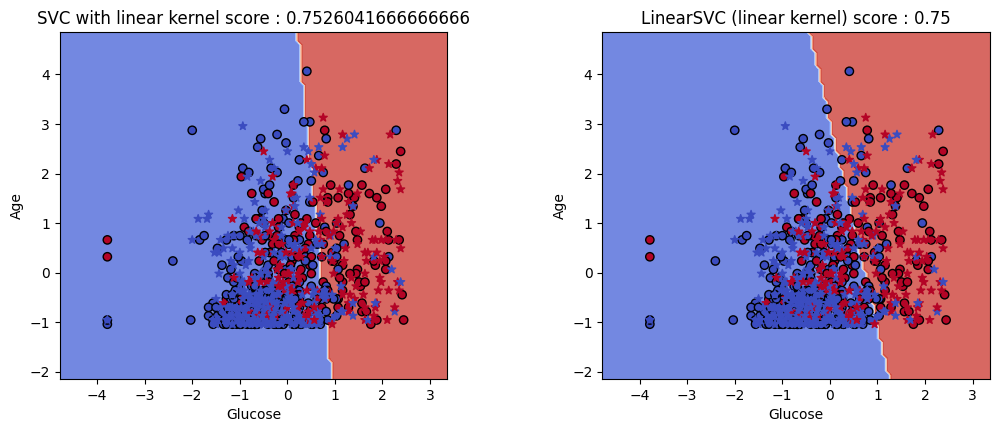

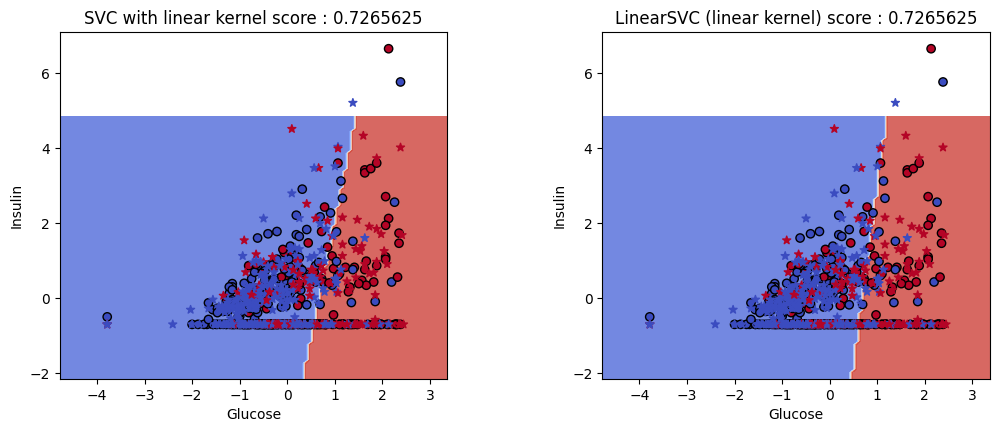

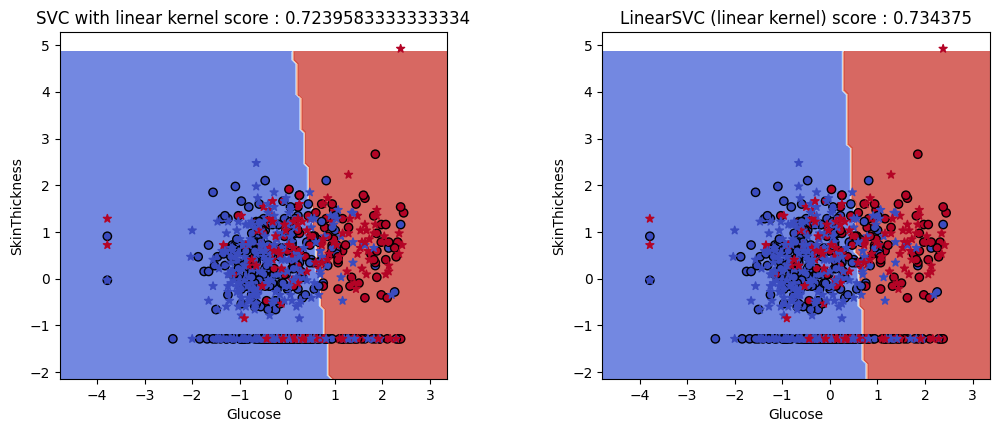

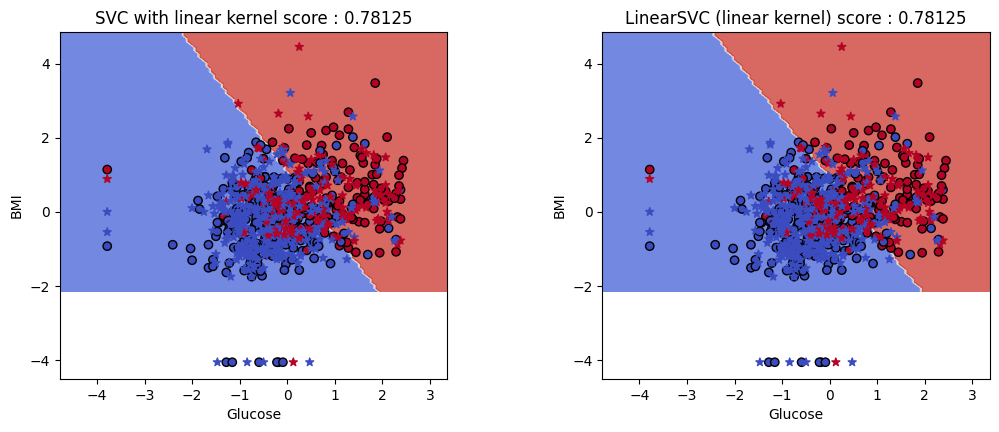

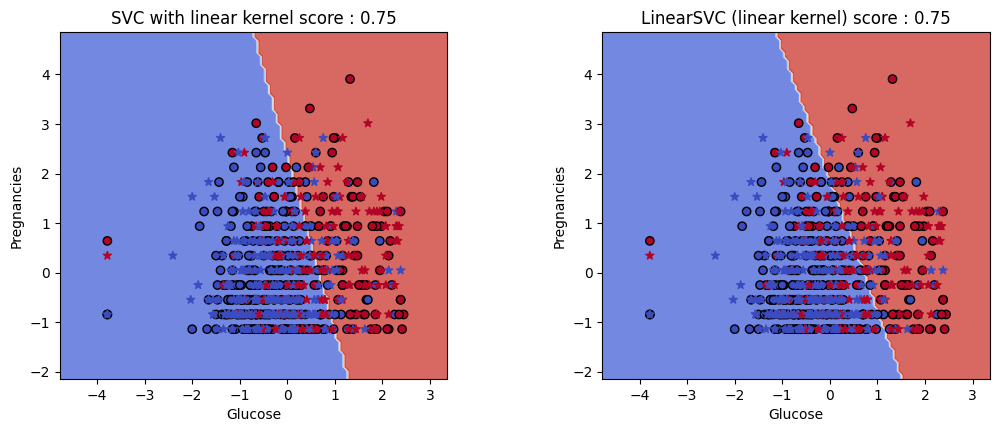

In [125]:
colonneB = ["Age","Insulin","SkinThickness","BMI","Pregnancies"]
colonneA = ["Glucose"]

for j in range(len(colonneB)):
    
    X=donnees[["Glucose", colonneB[j]]]
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    lin_svc = svm.LinearSVC(C=1).fit(X_train, y_train)
    svc = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

    titles = ['SVC with linear kernel', 'LinearSVC (linear kernel)']
    fig = plt.figure(figsize=(12, 4.5))
    
    for i, clf in enumerate((svc, lin_svc)):
        plt.subplot(1, 2, i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)
        # Surface de décision 
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
        Z = Z.reshape(xx.shape) 

        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8) 
        # Afficher aussi les points d'apprentissage 
        plt.scatter(X_train[:,0],  X_train[:,1],  label="train",  edgecolors='k', 
        c=y_train, cmap=plt.cm.coolwarm) 
        plt.scatter(X_test[:,0], X_test[:,1], label="test", marker='*', c=y_test, 
        cmap=plt.cm.coolwarm) 
        plt.xlabel("Glucose") 
        plt.ylabel(colonneB[j]) 
        plt.title(titles[i]+" score : "+str(clf.score(X_test, y_test)))
    plt.show()

Réalisez l’optimisation d’une nouvelle machine à vecteur de support linéaire 
mais  en  utilisant  les  quatre  attributs  du  jeu  de  données  Iris.  Le  score  de 
classification en test a-t-il augmenté ? Pourquoi ? <br>

In [134]:
X = donnees.drop(["Outcome"], axis=1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)


maxC=0
maximum = 0
loss =  ""

for i in range(1,101):
    tuned_params = {"C":[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2,5,10,50,100,500,1000], "loss":["hinge","squared_hinge"]}
    grid_search1 = GridSearchCV(svm.LinearSVC(), param_grid=tuned_params, cv=2)
    grid_search1.fit(X_train, y_train)          

    C = grid_search1.best_params_["C"] 
    lin_svc = svm.LinearSVC(C=C) 
    lin_svc.fit(X_train, y_train)
    pred = lin_svc.predict(X_test)
    score = lin_svc.score(X_test, y_test)
    
    if score > maximum:
        maximum = score
        maxC = C
        loss = grid_search1.best_params_["loss"] 
    
print("Score : ", maximum, " C : ", C, " et loss : ", loss)


Score :  0.7902439024390244  C :  100  et loss :  hinge


In [ ]:
X = donnees.drop(["Outcome"], axis=1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)


maxC=0
maximum = 0
loss =  ""

while maximum < 0.80:

    for i in range(1,101):
        tuned_params = {"C":[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2,5,10,50,100,500,1000], "loss":["hinge","squared_hinge"]}
        grid_search1 = GridSearchCV(svm.LinearSVC(), param_grid=tuned_params, cv=2)
        grid_search1.fit(X_train, y_train)          

        C = grid_search1.best_params_["C"] 
        lin_svc = svm.LinearSVC(C=C) 
        lin_svc.fit(X_train, y_train)
        pred = lin_svc.predict(X_test)
        score = lin_svc.score(X_test, y_test)

        if score > maximum:
            maximum = score
            maxC = C
            loss = grid_search1.best_params_["loss"] 

print("Score : ", maximum, " C : ", C, " et loss : ", loss)
